In [ ]:
# to access files from google drive.

from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !mkdir drive/MyDrive/test

In [ ]:
# importing necessary libraries 

import os
import cv2
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Conv2D, Flatten, MaxPooling2D, AveragePooling2D
from keras.optimizers import Adam

In [ ]:
from sklearn.metrics import cohen_kappa_score, f1_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


In [ ]:

# Preparing Dataset

x, y = [], []

for disease in os.listdir('drive/MyDrive/PlantDiseaseDatasetNew/'):
  for img in os.listdir('drive/MyDrive/PlantDiseaseDatasetNew/'+ disease):
    x.append(cv2.resize(cv2.imread('drive/MyDrive/PlantDiseaseDatasetNew/'+ disease + '/' + img),(250,250)))
    y.append(disease)

x, y = np.array(x), np.array(y)

print(x.shape,y.shape)




(5634, 250, 250, 3) (5634,)


In [ ]:
# Encoding Class Labels 

le = preprocessing.LabelEncoder()
le.fit(['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch'])
y_ = le.transform(y)

In [ ]:
# Splitting Dataset into Train, Test and Validation sets

X_train, X_test, y_train, y_test = train_test_split(x, y_, test_size=0.10, random_state = 0)

X_train, X_CV, y_train, y_CV = train_test_split(X_train, y_train, test_size=0.10, random_state=0)

In [ ]:
# Normalizing 

X_train = X_train/255
X_test = X_test/255
X_CV = X_CV/255

In [ ]:
# Converting class labels into binary class matrices

y_train = keras.utils.to_categorical(y_train,num_classes=12)
y_test = keras.utils.to_categorical(y_test,num_classes=12)
y_CV = keras.utils.to_categorical(y_CV,num_classes=12)

In [ ]:
# parameters

drop = 0.5
lrate = 1e-4
batch = 32
epoc = 14

# Creating CNN Network to train the given data
model = Sequential([
    Conv2D(8, (3,3),  activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(16, (3,3), activation="relu"),
    BatchNormalization(),
    AveragePooling2D((2,2)),
    Conv2D(32, (3,3), activation="relu"),
    BatchNormalization(),
    AveragePooling2D((2,2)),
    Flatten(),
    Dense(150, activation="tanh"),
    Dropout(drop),
    BatchNormalization(),
    Dense(12, activation="softmax")
])

In [ ]:
# Defining Callback
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=10)

In [ ]:
# Training the Model

model.compile(optimizer=Adam(lr=lrate), loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch, epochs=epoc, validation_data=(X_CV,y_CV),callbacks=[early_stopping_callback])


Epoch 1/14
143/143 [==============================] - 8s 25ms/step - loss: 1.5848 - accuracy: 0.4908 - val_loss: 5.0055 - val_accuracy: 0.0888
Epoch 2/14
143/143 [==============================] - 3s 20ms/step - loss: 0.5326 - accuracy: 0.8287 - val_loss: 3.9091 - val_accuracy: 0.1578
Epoch 3/14
143/143 [==============================] - 3s 20ms/step - loss: 0.3690 - accuracy: 0.8877 - val_loss: 2.6103 - val_accuracy: 0.3570
Epoch 4/14
143/143 [==============================] - 3s 20ms/step - loss: 0.2557 - accuracy: 0.9291 - val_loss: 0.8308 - val_accuracy: 0.7298
Epoch 5/14
143/143 [==============================] - 3s 20ms/step - loss: 0.2022 - accuracy: 0.9477 - val_loss: 0.3276 - val_accuracy: 0.8935
Epoch 6/14
143/143 [==============================] - 3s 20ms/step - loss: 0.1405 - accuracy: 0.9677 - val_loss: 0.3205 - val_accuracy: 0.8895
Epoch 7/14
143/143 [==============================] - 3s 20ms/step - loss: 0.1084 - accuracy: 0.9784 - val_loss: 0.2465 - val_accuracy: 0.9112

In [ ]:
print("Final accuracy on test set : ", 100*model.evaluate(X_test, y_test)[1], "%")

18/18 [==============================] - 0s 11ms/step - loss: 0.1992 - accuracy: 0.9309
Final accuracy on test set :  93.08510422706604 %


In [ ]:
# COHEN KAPPA SCORE ON TEST SET:-
prediction = np.argmax(model.predict(X_test),axis=1)

In [ ]:
print("Cohen Kappa score is : ", cohen_kappa_score(prediction,np.argmax(y_test,axis=1)))

Cohen Kappa score is :  0.9243507598972359


In [ ]:
# F1 SCORE ON TEST SET :-
print("F1 score is : ", f1_score(prediction,np.argmax(y_test,axis=1), average = 'macro'))

F1 score is :  0.9298910429496555


Confusion Matrix is : 


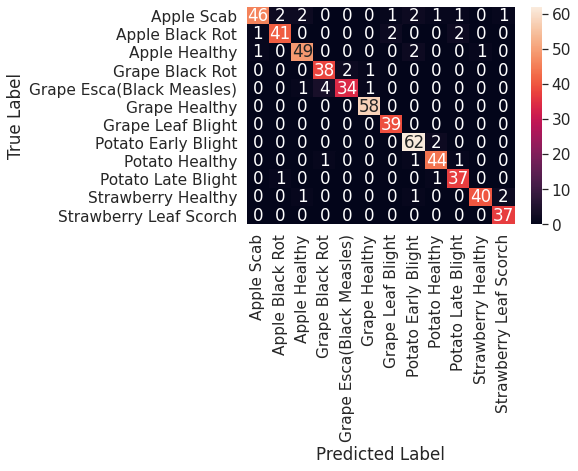

In [ ]:
# CONFUSION MATRIX
conf_matrix = confusion_matrix(np.argmax(y_test,axis=1),prediction)

print("Confusion Matrix is : ")

df = pd.DataFrame(conf_matrix,columns=['Apple Scab',
 'Apple Black Rot',
 'Apple Healthy',
 'Grape Black Rot',
 'Grape Esca(Black Measles)',
 'Grape Healthy',
 'Grape Leaf Blight',
 'Potato Early Blight',
 'Potato Healthy',
 'Potato Late Blight',
 'Strawberry Healthy',
 'Strawberry Leaf Scorch'],index = ['Apple Scab',
 'Apple Black Rot',
 'Apple Healthy',
 'Grape Black Rot',
 'Grape Esca(Black Measles)',
 'Grape Healthy',
 'Grape Leaf Blight',
 'Potato Early Blight',
 'Potato Healthy',
 'Potato Late Blight',
 'Strawberry Healthy',
 'Strawberry Leaf Scorch'] )
sn.set(font_scale=1.4)
sn.heatmap(df,annot=True,fmt='d')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()